This tutorial refers to using the `fmi` library which can be found [here](https://github.com/asvcode/fmi) and the [fastai](https://github.com/fastai) medical imaging module

## Goal

The goal of this tutorial is to display how `dicom_splitter` works in minimizing the occurence of having the same patient represented in both the train and validation sets

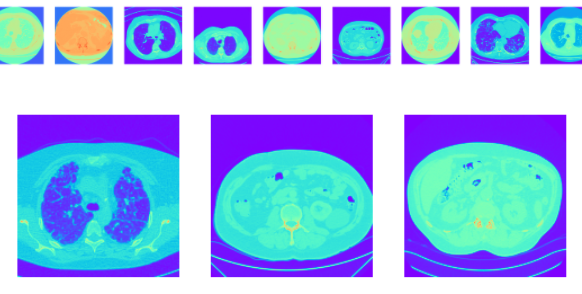

## Dependancies

Load `gdcm` library - use `pe-models` database to access gdcm.tar file

In [ ]:
!cp ../input/pe-models/gdcm.tar .
!tar -xvzf gdcm.tar
!conda install --offline ./gdcm/gdcm-2.8.9-py37h71b2a6d_0.tar.bz2
print("done")

import libraries

In [ ]:
from fastai.torch_core import set_seed
from fastai.vision.all import *
from fastai.medical.imaging import *
from torchvision.utils import save_image

import gdcm
matplotlib.rcParams['image.cmap'] = 'bone'

Currently the `fmi` package is still under construction and not pip installable. Instead install via the `fmipackage` dataset

In [ ]:
!cp -r ../input/fmipackage/fmi-master/* ./

In [ ]:
from fmi.explore import *
from fmi.preprocessing import *
from fmi.pipeline import *

In [ ]:
source = '../input/osic-pulmonary-fibrosis-progression'
os_items = get_dicom_files(source, folders='train')

## Splitter

The files and csv file used in this section was created from this [tutorial](https://www.kaggle.com/avirdee/dicom-dataframe-tutorial/) where we reduced the initial database of over 33000 images to 880.

> Note: For convenience we can use the `pct-5` dataset which was created using this [tutorial](https://www.kaggle.com/avirdee/dicom-dataframe-tutorial/)

In [ ]:
sort_w5 = pd.read_csv('../input/pct-5/sort_w5.csv')
t_source = '../input/pct-5/test_5'
t_files = get_dicom_files(t_source)
t_files

Create a `random_` function that will create a random index for our testing, in this case 10 numbers choosen randomly between 0 and the len of the dataset

In [ ]:
def random_(items, value=10):
    randomList = []
    for i in range(0,value):
        randomList.append(random.randint(0,len(items)))
    return items[randomList]

### How Does it work?

To see how `dicom_splitter` works we need to create a smaller random dataset of 30 images

In [ ]:
t_files30 = random_(t_files, 30)
t_files30

In [ ]:
set_seed(7)
check_duplicate(t_files30, seed=7)

In [ ]:
set_seed(77)
check_duplicate(t_files30, seed=77)

In [ ]:
set_seed(77)
get_x1 = lambda x:f'{t_source}/{x.PatientID}/{str(x.InstanceNumber)}.dcm'
get_y1 = ColReader('img_pct_window')

blocks = (ImageBlock(cls=PEWindow), CategoryBlock)
db = DataBlock(blocks=blocks,
                   get_x=get_x1,
                   splitter=dicom_splitter(t_files, seed=77),
                   item_tfms=Resize(512),
                   get_y=get_y1,
                   batch_tfms=[Resize(256), IntToFloatTensor(div=255)])

In [ ]:
dls = db.dataloaders(sort_w5, bs=16, n_workers=0)
dls.show_batch(figsize=(20,20))

For more about the `fmi` library: [view on Github](https://github.com/asvcode/fmi)